<center><h1><b>Analysis of Adidas Sales in USA</b></h1></center>

*Analyzed by: Dendi Apriyandi*


Tableau Dashboard:
https://public.tableau.com/app/profile/dendi.apriyandi.suntoro/viz/SalesAnalysisofAdidasProductsinUSA/SalesAnalysisofAdidasProductsinUSA?publish=yes

Dataset:
https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

# Data Preparation

# Identification of problems

## Problem Topics

Menentukan faktor-faktor yang mempengaruhi profitabilitas penjualan produk Adidas di berbagai wilayah di Amerika dan kondisi penjualan.

### **SMART Method**

#### **Specific**
- Menentukan faktor-faktor yang mempengaruhi profitabilitas penjualan produk Adidas di berbagai wilayah Amerika Serikat dan kondisi penjualannya.

#### **Measurable**
- Mengukur performa penjualan dan keuntungan berdasarkan produk, wilayah, dan metode penjualan, dsb.

#### **Achievable**
- Menganalisis dataset penjualan produk Adidas dengan menggunakan teknik analisis data seperti deskriptif statistik, visualisasi data, dan model prediktif untuk mencapai pemahaman yang jelas tentang faktor-faktor yang mempengaruhi profitabilitas.

#### **Relevant**
- Memahami faktor-faktor yang mempengaruhi penjualan dan profitabilitas adalah penting untuk mengoptimalkan strategi penjualan Adidas, meningkatkan keuntungan, dan menargetkan pasar dengan lebih efektif.

#### **Time-bound**
- Menyelesaikan analisis dalam jangka waktu 3 bulan, dengan milestone sebagai berikut:
 1.  **Bulan pertama**: Mengumpulkan dan membersihkan data, melakukan analisis deskriptif awal.
 2. **Bulan kedua**: Melakukan analisis mendalam untuk setiap faktor (produk, harga, geografis, metode penjualan, tren, dsb).
 3. **Bulan ketiga**: Menyusun laporan dan rekomendasi berdasarkan temuan analisis.


## Problem Statement

- Adidas ingin membuat strategi baru untuk meningkatkan penjualan di Amerika serikat,  oleh karena itu saya sebagai data analis diminta oleh adidas untuk menganalisa dataset yang mereka miliki

## Background

- Adidas sebagai salah satu produsen produk olahraga terkemuka di dunia, melakukan penjualan melalui berbagai retailer di banyak wilayah di Amerika. Memahami faktor-faktor yang berkontribusi pada penjualan dan profitabilitas dapat membantu Adidas mengoptimalkan strategi penjualan mereka, meningkatkan profitabilitas, dan menargetkan pasar dengan lebih efektif.

## Problem Description

- Adidas telah mengeluarkan biaya yang cukup besar untuk meningkatkan dan memaksimalkan keuntungan penjualan pada tiap retail yang menjual produk adidas di Amerika Serikat, namun hasilnya belum cukup sesuai dengan target. Hal ini jika tidak ditindak lanjuti akan menyebabkan pengeluaran biaya (cost) yang tidak efektif dan merugikan perusahaan

| Nama Kolom | Keterangan |
| -- | -- |
|Retailer | Outlet yang menjual produk Adidas |
|Retailer ID | Store ID |
|Invoice Date|Tanggal Pembelian|
| Region|Wilayah |
|State|Negara Bagian|
|City|Kota|
|Product|Kategori Produk|
|Price per Unit | Harga tiap item |
|Units Sold | Kuantitas Terjual |
|Total Sales | Total Pendapatan |
|Operating Profit | Keuntungan Operasional |
|Operating Margin | Margin Operational |
|Sales Method | Metode Penjualan/Pembelian |

# Data Loading

## Import Library

In [ ]:
# Library
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced plotting
import datetime as dt  # Date and time operations
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.model_selection import train_test_split  # Data splitting
from google.colab import drive  # Import the Google Drive module from Google Colab
from scipy import stats  # Statistical functions

## Load Dataset

### From Google Drive

In [ ]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project_101/adidas_dataset.csv')  # Read the file after mounting

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

Mounted at /content/drive


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


### From Local

In [ ]:
# # Read DataFrame from CSV file:
# df = pd.read_csv('adidas_dataset.csv')  # Load data from 'adidas_dataset.csv' into a DataFrame

# # Display the first 5 rows of the DataFrame:
# df.head()  # Show the first 5 rows to get an overview of the data

DataFrame `adidas_dataset.csv` telah berhasil di-load

## Retailer

In [ ]:
# Get unique values in the 'Retailer' column and print them:
print(df.Retailer.unique())  # Display the unique values in the 'Retailer' column

# Print a separator line:
print('='*23)  # Print a line of '=' characters for visual separation

# Print the total number of unique values in the 'Retailer' column:
print('Total:', len(df.Retailer.unique()))  # Show the count of unique values in the 'Retailer' column

['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
Total: 6


Retailer yang paling banyak outletnya adalah **Foot Locker** dengan jumlah outlet sebanyak **2637** dari total 6 Retailer yang ada di Amerika Serikat

In [ ]:
# Get unique values in the 'Retailer' column:
df.Retailer.value_counts()  # Retrieve and display the unique values present in the 'Retailer' column

,count
Retailer,
Foot Locker,2637
West Gear,2374
Sports Direct,2032
Kohl's,1030
Amazon,949
Walmart,626


Retailer yang paling banyak outletnya adalah **Foot Locker** dengan jumlah outlet sebanyak **2637** dari total 6 Retailer yang ada di Amerika Serikat

## Product

In [ ]:
# Get unique values in the 'Product' column and print them:
print(df.Product.unique())  # Display the unique values in the 'Product' column

# Print a separator line:
print('='*23)  # Print a line of '=' characters for visual separation

# Print the total number of unique values in the 'Product' column:
print('Total Unique Product:', len(df.Product.unique()))  # Show the count of unique values in the 'Product' column

["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]
Total Unique Product: 6


## Count of Product

In [ ]:
# Count the number of occurrences of each value in the 'Product' column:
df.Product.value_counts()  # Display a count of each unique value in the 'Product' column

,count
Product,
Men's Street Footwear,1610
Men's Athletic Footwear,1610
Women's Street Footwear,1608
Women's Apparel,1608
Women's Athletic Footwear,1606
Men's Apparel,1606


Jenis produk yang dibeli cenderung tidak memiliki perbedaan yang signifikan jika dibandingkan satu sama lain

## Number of Rows and Columns

In [ ]:
# Get the number of rows and columns:
num_rows, num_columns = df.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 9648
Number of columns: 13


## Data Information

In [ ]:
# Get a concise summary of the DataFrame:
df.info()  # Displays information about the DataFrame, including the number of non-null entries, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## Missing Value

In [ ]:
# Count the number of missing values in each column:
df.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


Tidak terdapat missing value pada dataset

## Data Type

In [ ]:
# Get the data types of each column:
df.dtypes  # Displays the data type of each column in the DataFrame

,0
Retailer,object
Retailer ID,int64
Invoice Date,object
Region,object
State,object
City,object
Product,object
Price per Unit,object
Units Sold,object
Total Sales,object


Dilakukan juga pengecekan tipe data pada DataFrame, terdapat kolom yang tipe datanya tidak sesuai/harus dirubah, yaitu:
- `Price per unit`, `Total sales`, `Operating Profit`, `Operating Margin` seharusnya 'float64'
- `Unit sold` seharusnya 'int64'
- `Invoice Date` seharusnya 'date64'

## Summary Statistics for Categorical Columns

In [ ]:
# Get descriptive statistics for categorical columns and transpose the result:
df.describe(include=object).T  # Displays summary statistics for categorical columns, transposed for easier viewing

,count,unique,top,freq
Retailer,9648,6,Foot Locker,2637
Invoice Date,9648,724,1/17/2021,77
Region,9648,5,West,2448
State,9648,50,California,432
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Price per Unit,9648,94,$50.00,675
Units Sold,9648,361,225,207
Total Sales,9648,3138,"$100,000",67
Operating Profit,9648,4187,"$105,000",39


Tabel diatas menampilkan informasi singkat statistik deskriptif dataset

## Columns

In [ ]:
# Get the column names of the DataFrame:
df.columns # Returns a list of column names in the DataFrame

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

Kolom-kolom yang terdapat pada dataset bisa kita ketahui setelah menjalankan syntax **df.columns**

## Duplicated Rows

In [ ]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows


Duplicated Rows: 0


# Data Cleaning

In [ ]:
# Lowercase column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


## Symbol Cleaning and Remove

In [ ]:
# Clean 'price_per_unit' column:
df['price_per_unit'] = df['price_per_unit'].str.replace('$', '') \
                                           .str.replace('.', '') \
                                           .str.replace('00','')

# Clean 'units_sold' column:
df['units_sold'] = df['units_sold'].str.replace(',', '')  # Remove commas

# Clean and convert 'operating_margin' column:
df['operating_margin'] = pd.to_numeric(df['operating_margin'].str.replace('%', ''), errors='coerce')  # Remove percentage signs and convert to numeric

# Convert 'operating_margin' to decimal form:
df['operating_margin'] = df['operating_margin'] / 100  # Convert percentage to decimal

# Clean 'total_sales' and 'operating_profit' columns:
numeric_columns = ['total_sales', 'operating_profit']
for column in numeric_columns:
    df[column] = df[column].str.replace('$', '') \
                           .str.replace(',', '')

# Display the first 5 rows of the cleaned DataFrame:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


Simbol-simbol yang akan mengganggu pada proses pengolahan data telah berhasil dihapus

## Convert Data Type (1)

In [ ]:
# Convert 'invoice_date' column to datetime format:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=False)  # Convert the 'invoice_date' column to datetime format, assuming the month comes before the day

kolom *invoice_date* tipe datanya diubah dari **object** menjadi **datetime**

## Convert Data Type (2)

In [ ]:
# Convert selected columns to float data type:
numeric_columns = ['price_per_unit', 'total_sales', 'operating_profit']

for column in numeric_columns:
    df[column] = df[column].astype('float64')  # Convert each specified column to the 'float64' data type

selain itu kolom `price_per_unit`, `total_sales`, `operating_profit` juga yang diubah tipe datanya menjadi 'float'

In [ ]:
# Convert the 'units_sold' column to the integer data type:
df['units_sold'] = df['units_sold'].astype('int64')  # Change 'units_sold' column to 'int64' type

# Check the data types of all columns in the DataFrame:
df.dtypes  # Display the data types of each column in the DataFrame

,0
retailer,object
retailer_id,int64
invoice_date,datetime64[ns]
region,object
state,object
city,object
product,object
price_per_unit,float64
units_sold,int64
total_sales,float64


Tipe data kolom `units_sold` diubah dari **object** menjadi **int64** dan
seluruh kolom telah berhasil disesuaikan tipe datanya, artinya data sudah siap diolah dan dianalisa lebih lanjut

## Descriptive Statistics for Object Columns (Categorical)

In [ ]:
# Get descriptive statistics for all object (categorical) columns and transpose the result:
df.describe(include=object).T  # Displays summary statistics (e.g., count, unique, top, freq) for categorical columns, transposed for easier viewing

,count,unique,top,freq
retailer,9648,6,Foot Locker,2637
region,9648,5,West,2448
state,9648,50,California,432
city,9648,52,Portland,360
product,9648,6,Men's Street Footwear,1610
sales_method,9648,3,Online,4889


## Descriptive Statistics for Float Columns

In [ ]:
# Get descriptive statistics for all float columns and transpose the result:
df.describe(include=float).T  # Displays summary statistics (e.g., mean, std, min, max) for columns of float data type, transposed for easier viewing

,count,mean,std,min,25%,50%,75%,max
price_per_unit,9648.0,45.165319,14.686861,1.0,35.00,45.00,55.00,110.0
total_sales,9648.0,93273.437500,141916.016727,0.0,4254.50,9576.00,150000.00,825000.0
operating_profit,9648.0,34425.282131,54193.124141,0.0,1922.00,4371.50,52063.00,390000.0
operating_margin,9648.0,0.422991,0.097197,0.1,0.35,0.41,0.49,0.8


## Descriptive Statistics for Integer Columns

In [ ]:
# Get descriptive statistics for all integer columns and transpose the result:
df.describe(include='int').T  # Displays summary statistics (e.g., count, mean, std, min, max) for integer columns, transposed for easier viewing

,count,mean,std,min,25%,50%,75%,max
retailer_id,9648.0,1.173850e+06,26360.377309,1128299.0,1185732.0,1185732.0,1185732.0,1197831.0
units_sold,9648.0,2.569300e+02,214.252030,0.0,106.0,176.0,350.0,1275.0


## Data Saving

In [ ]:
# # Save the cleaned DataFrame to a CSV file:
# df.to_csv('adidas_dataset_cleaned.csv', index=False)  # Export the DataFrame to 'adidas_dataset_cleaned.csv' without including the index column

## Create New DataFrame (Cleaned)

In [ ]:
# # Read the cleaned CSV file into a new DataFrame:
# df_cleaned = pd.read_csv('/content/drive/MyDrive/Project_101/adidas_dataset_cleaned.csv')  # Load the data from google drive into a DataFrame called df_cleaned

# Explolatory Data Analysis

Bagian ini berisi proses analisis, penjelasan, perhitungan statistik deskriptif, inferensial, serta pembuatan visualisasi data. Selain itu visualisasi data wajib diberikan insight pada tiap visualisasinya.

### Which `retailer` has the most stores in the United States?

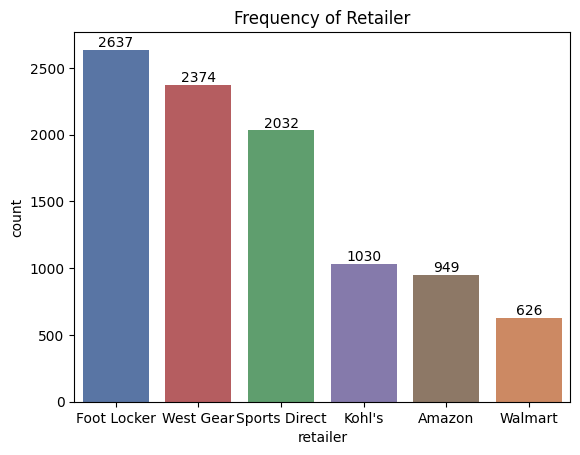

In [ ]:
plt.title("Frequency of Retailer")
figer = sns.countplot(x="retailer", data=df, hue="retailer", order=df["retailer"].value_counts()
                      .index, palette="deep", legend=False)
for container in figer.containers:
    figer.bar_label(container)
plt.show()

- **Foot Locker** merupakan `retailer` yang tokonya paling banyak berada di Amerika Serikat dengan 2637, disusul **West Gear** sebanyak 2374 dan **walmart** yang paling rendah yaitu 626.

### Which region has the most outlets selling Adidas products?

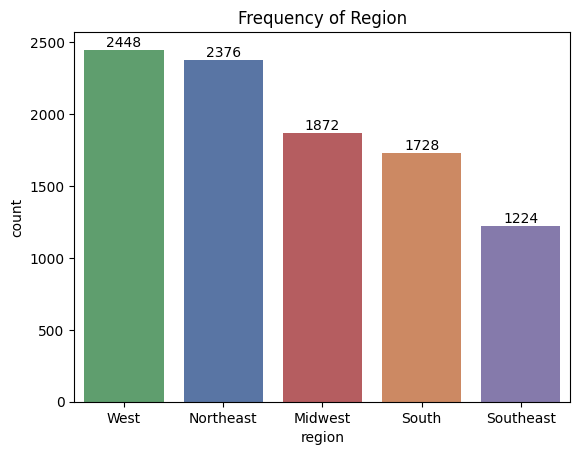

In [ ]:
plt.title("Frequency of Region")
figer = sns.countplot(x="region", data=df, hue="region", order=df["region"].value_counts()
                      .index, palette="deep", legend=False)
for container in figer.containers:
    figer.bar_label(container)
plt.show()

- Lokasi outlet di Amerika Serikat yang menjual produk Adidas paling banyak berada di `region` **West**

### Which `state` has the most stores selling Adidas products?

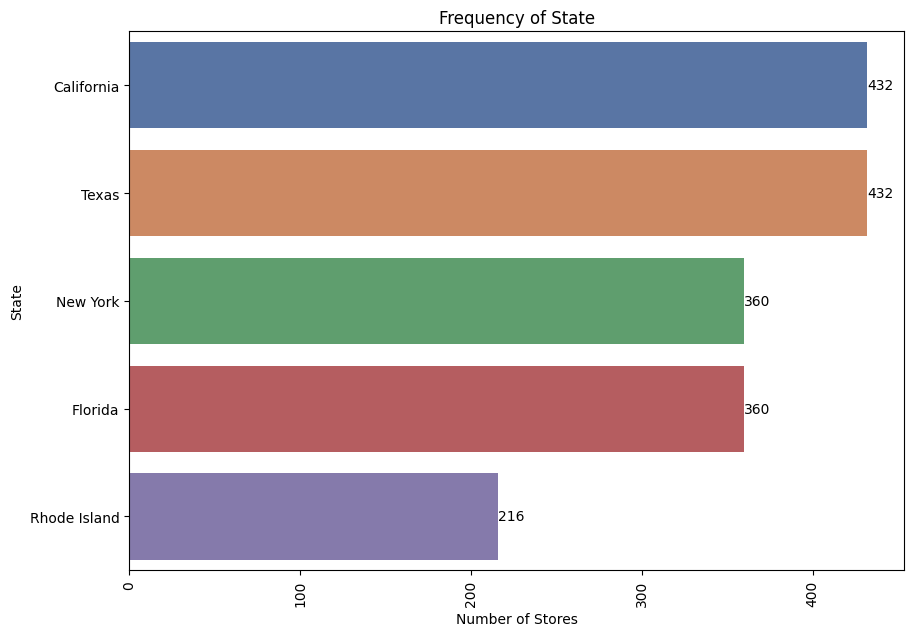

In [ ]:
plt.figure(figsize=(10, 7))
figer = sns.barplot(y=df["state"].value_counts().sort_values(ascending=False)[:5].index,
                    x=df["state"].value_counts().sort_values(ascending=False)[:5].values,
                    hue=df["state"].value_counts().sort_values(ascending=False)[:5].index,
                    palette="deep",
                    dodge=False,
                    legend=False)

for container in figer.containers:
    figer.bar_label(container)

plt.xticks(rotation=90)
plt.title("Frequency of State")
plt.xlabel("Number of Stores")
plt.ylabel("State")
plt.show()


- California dan Texas memiliki outlet terbanyak yang menjual produk adidas, lalu New York dan Florida pada peringkat kedua

### Which `city` has the most outlets selling Adidas products?

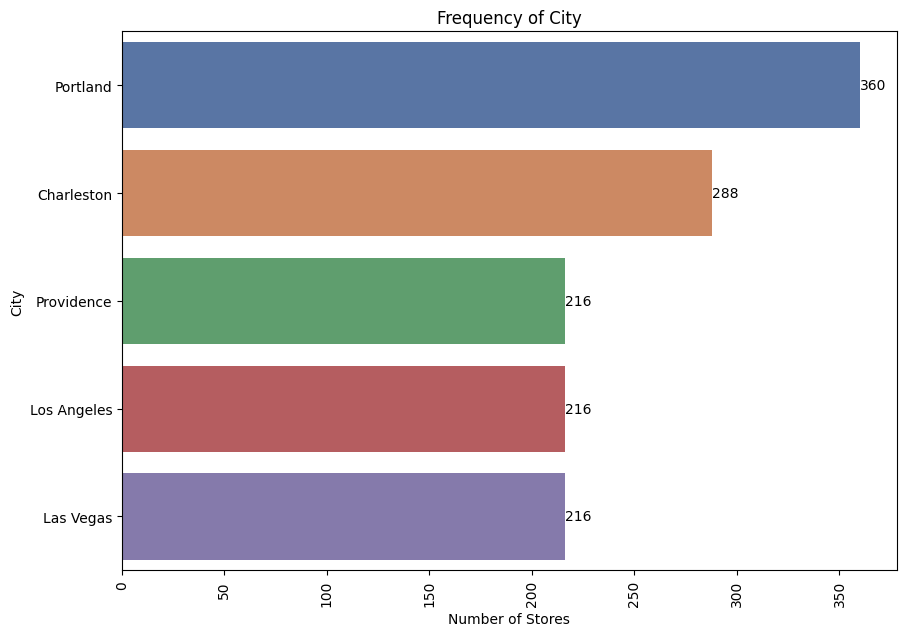

In [ ]:
plt.figure(figsize=(10, 7))
figer = sns.barplot(y=df["city"].value_counts().sort_values(ascending=False)[:5].index,
                    x=df["city"].value_counts().sort_values(ascending=False)[:5].values,
                    hue=df["city"].value_counts().sort_values(ascending=False)[:5].index,
                    palette="deep",
                    dodge=False,
                    legend=False)

for container in figer.containers:
    figer.bar_label(container)

plt.xticks(rotation=90)
plt.title("Frequency of City")
plt.xlabel("Number of Stores")
plt.ylabel("City")
plt.show()


- `portland` merupakan kota yang paling banyak memiliki outlet yang menjual produk adidas

## Grouping by Gender

- Membuat subset terlebih dahulu untuk mengelompokan gender, agar mengetahui `total_sales` berdasarkan `gender`

In [ ]:
# List of products that determine gender:
male = ["Men's Street Footwear", "Men's Athletic Footwear", "Men's Apparel"]  # Products for men
female = ["Women's Street Footwear", "Women's Athletic Footwear", "Women's Apparel"]  # Products for women

# Create a new column "gender" based on values in the "product" column:
df['gender'] = ''  # Initialize the "gender" column with empty strings

# Loop through the DataFrame to determine gender based on the product:
for idf, row in df.iterrows():  # Iterate over DataFrame rows
    product = row['product']  # Get the product name
    if product in male:
        df.loc[idf, 'gender'] = 'Men'  # Assign 'Men' to the gender column if the product is for men
    elif product in female:
        df.loc[idf, 'gender'] = 'Women'  # Assign 'Women' to the gender column if the product is for women

# Display the updated DataFrame:
df.head()  # Show the DataFrame with the new "gender" column

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method,gender
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,Men
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,Men
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,Women
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,Women
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,Men


`product` telah dikategorikan berdasarkan gender dan kolom `gender` sudah ditambahkan kedalam dataset

### Total Profit by Gender (Percentage)

In [ ]:
# Group by 'gender' and calculate the sum of 'total_sales' for each group, then divide by the total sales to get proportions:
df.groupby("gender").agg({"total_sales": "sum"}) / df["total_sales"].sum()

,total_sales
gender,
Men,0.540313
Women,0.459687


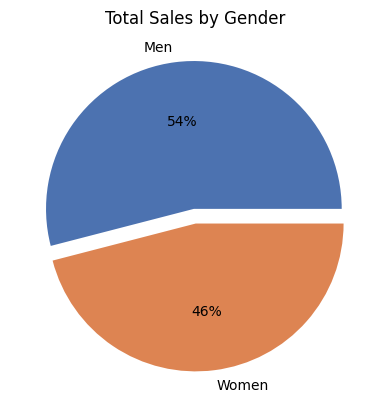

In [ ]:
# Calculate total sales by gender
gender_sales = df.groupby("gender")["total_sales"].sum()

# Calculate proportions
proportions = gender_sales / gender_sales.sum()

# Set the color palette to "deep"
colors = sns.color_palette("deep")

# Create pie chart
plt.pie(proportions,
        labels=proportions.index,
        autopct='%.0f%%',
        # shadow=True,
        explode=[0.05, 0.05],
        colors=colors)  # Apply the deep color palette

plt.title("Total Sales by Gender")
plt.show()

- Perbandingan **Men** and **Women** dilihat dari `total_sales` perbedaannya tidak terlalu cukup signifikan (beda tipis)

In [ ]:
# # Save the cleaned DataFrame to a CSV file:
# df.to_csv('adidas_dataset_eda.csv', index=False)  # Export the DataFrame to 'adidas_dataset_eda.csv' without including the index column

### Total Sales by Product

In [ ]:
# Calculate top products by total sales
top_products = df[['product', 'total_sales']] \
              .groupby('product') \
              .sum() \
              .sort_values('total_sales', ascending=False)

top_products  # Display DataFrame with products

,total_sales
product,
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Men's Athletic Footwear,153673680.0
Women's Street Footwear,128002813.0
Men's Apparel,123728632.0
Women's Athletic Footwear,106631896.0


<ipython-input-34-3ebaedb6620b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index,


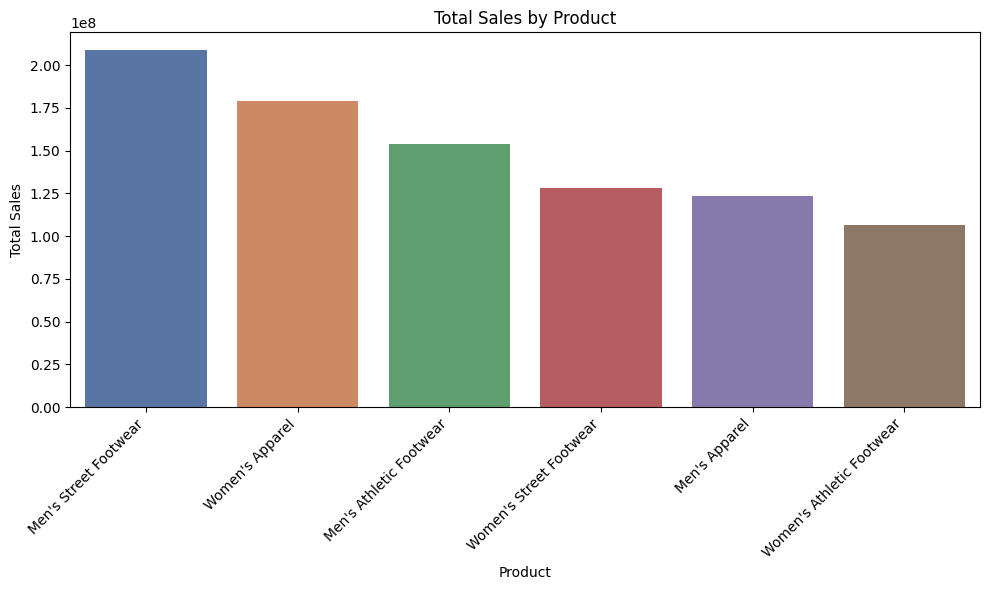

In [ ]:
# Create bar plot for top products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index,
            y=top_products['total_sales'],
            palette='deep')

plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Men's Street Footwear merupakan produk yang paling besar `total_sales`-nya dan diurutan kedua yaitu Women's Apparel

## Sales Method Distribution

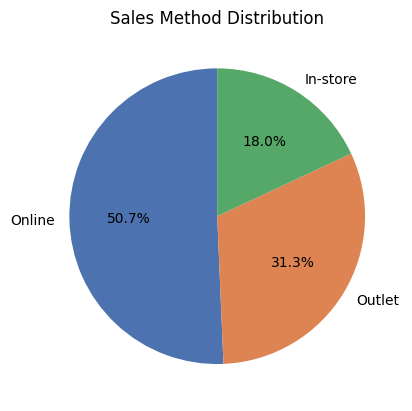

In [ ]:
# Data preparation
sales_method_counts = df['sales_method'].value_counts()

# Set the color palette to "deep"
colors = sns.color_palette("deep")

# Create pie chart
plt.pie(sales_method_counts,
        labels=sales_method_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)  # Apply the deep color palette

plt.title('Sales Method Distribution')
plt.show()


- Metode belanja **Online** merupakan yang paing disenangi oleh customers

### Operating Profit by Sales Method

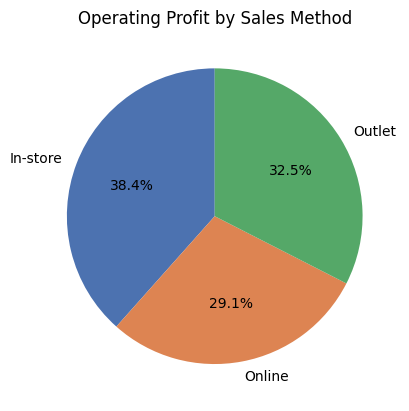

In [ ]:
# Group the data by 'sales_method' and calculate the sum of 'operating_profit'
profit_by_method = df.groupby('sales_method')['operating_profit'].sum()

# Set the color palette to "deep"
colors = sns.color_palette("deep")

# Create the pie chart
plt.pie(profit_by_method,
        labels=profit_by_method.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)  # Apply the deep color palette

plt.title('Operating Profit by Sales Method')
plt.show()


- Operating Profit paling besar berdasarkan sales method yaitu **In-store**

### Which total sales are the largest based on the sales method?

              total_sales  operating_profit
sales_method                               
In-store      356643750.0       127591382.0
Outlet        295585493.0       107988403.0
Online        247672882.0        96555337.0


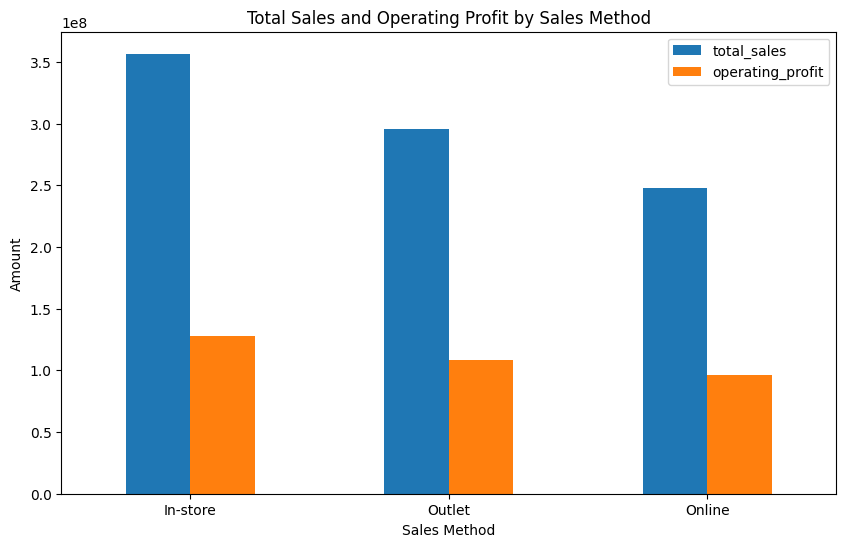

In [ ]:
# Group the data by 'sales_method' and calculate the sum of 'total_sales' and 'operating_profit'
sales_profit_by_method = df.groupby('sales_method')[['total_sales', 'operating_profit']].sum()

# Sort the result by 'total_sales' in descending order
sales_profit_by_method_sorted = sales_profit_by_method.sort_values('total_sales', ascending=False)

# Display the sorted result
print(sales_profit_by_method_sorted)

# Create a bar plot to visualize the data
sales_profit_by_method_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales and Operating Profit by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()


- **In-store** merupakan `sales_method` yang paling banyak memberi keuntungan, dilihat dari `total_sales` dan `operating_profit` yang paling besar dibandingkan yang lainnya

### Total Sales by Retailer

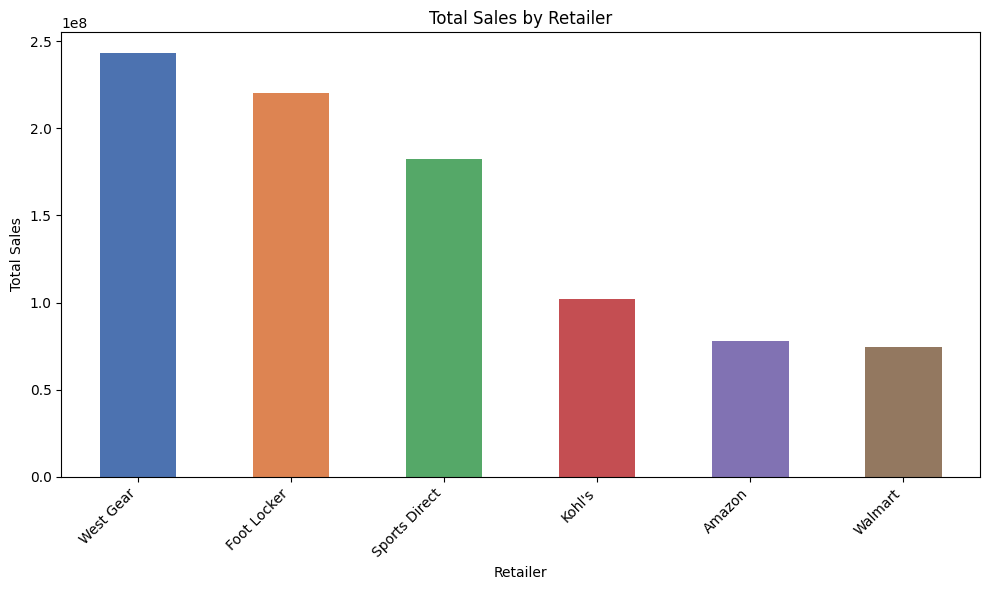

retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: total_sales, dtype: float64


In [ ]:
# Group the data by 'retailer' and calculate the sum of 'total_sales'
sales_by_retailer = df.groupby('retailer')['total_sales'].sum()

# Sort the result in descending order
sales_by_retailer_sorted = sales_by_retailer.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("deep")
sales_by_retailer_sorted.plot(kind='bar', color=colors)
plt.title('Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the sorted data
print(sales_by_retailer_sorted)


- **West Gear** menyumbang kontribusi `Total Sales` tertinggi, disusul **Foot Locker** dan **Sport Direct**

### Top 10 city with highest Total Sales

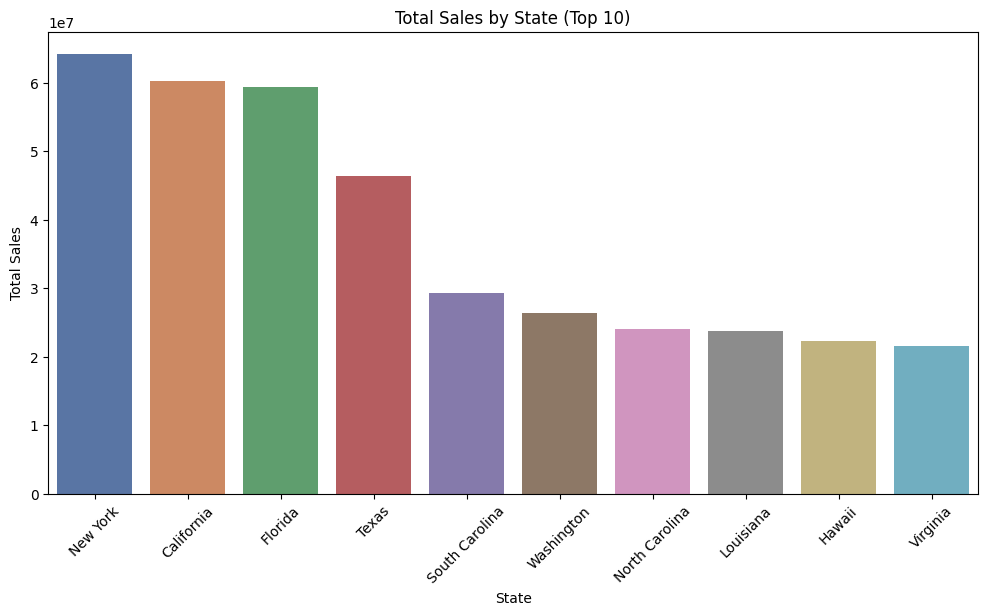

In [ ]:
# Data preparation
state = df[['state', 'total_sales']].groupby('state').sum().reset_index().sort_values('total_sales', ascending=False).iloc[:10, :]

# Create bar chart with different colors for each bar using 'deep' palette
plt.figure(figsize=(12, 6))
bar_colors = sns.color_palette("deep", len(state))
chart = sns.barplot(data=state, x='state', y='total_sales', hue='state', palette=bar_colors, dodge=False, legend=False)
chart.set_xticks(range(len(state)))
chart.set_xticklabels(state['state'], rotation=45)  # Miringkan label sumbu x
plt.title('Total Sales by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

- **New York** total sales-nya paling besar dibandingkan kota-kota lainnya

### Bottom 10 city with lowest Total Sales

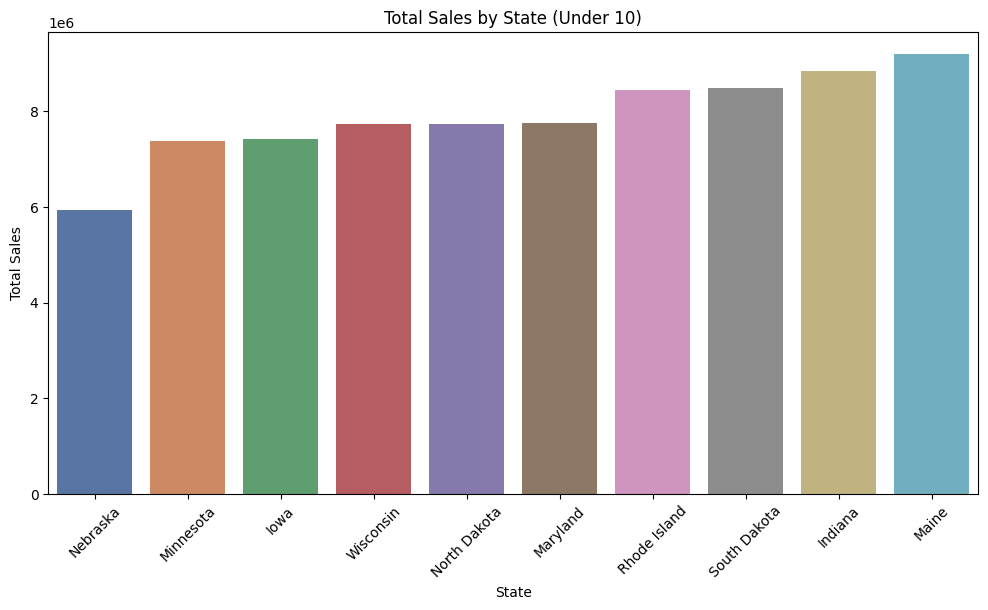

In [ ]:
# Data preparation
state = df[['state', 'total_sales']].groupby('state').sum().reset_index().sort_values('total_sales').iloc[:10, :]

# Create bar chart with different colors for each bar using 'deep' palette
plt.figure(figsize=(12, 6))
colors = sns.color_palette("deep", len(state))
chart = sns.barplot(data=state, x='state', y='total_sales', hue='state', palette=colors, dodge=False, legend=False)
chart.set_xticks(range(len(state)))
chart.set_xticklabels(state['state'], rotation=45)  # Rotate x-axis labels
plt.title('Total Sales by State (Under 10)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

- Nebraska merupakan state yang total sales-nya paling kecil

## Confidence Interval

In [ ]:
std = df['price_per_unit'].std()  # Hitung standar deviasi dari kolom 'Price per Unit'
N = len(df)  # Hitung panjang data pada DataFrame
low, up = stats.norm.interval(0.95, loc=df['price_per_unit'].mean(), scale=std/np.sqrt(N))  # Hitung interval kepercayaan 95%
print('Lower Limit:', int(low))  # Cetak batas bawah interval
print('Upper Limit:', int(up))  # Cetak batas atas interval

Lower Limit: 44
Upper Limit: 45


- Batas harga yang memungkinkan untuk menarik customer untuk membeli produk Adidas yaitu ada pada rentang minimal 44, sedangkan maksimumnya 45

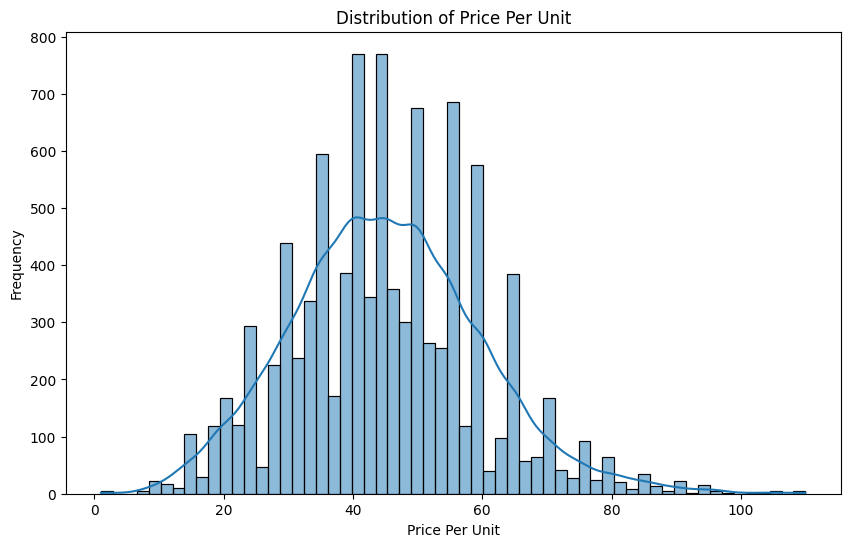

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_unit'], kde=True)
plt.title('Distribution of Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.show()

- Range harga berdasarkan frekuensi yaitu ada pada rentang 40-60

## Hypothesis Test (Using Chi-square)

Menguji hubungan antara **Unit Sold** dan **Total Sales**

In [ ]:
# Perform Chi-square test
contingency_table = pd.crosstab(df['retailer'], df['total_sales'])  # Creates a contingency table with counts of 'retailer' against 'total_sales'
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Performs the Chi-square test and returns the chi2 statistic, p-value, degrees of freedom, and expected frequencies

# Display the results
print("Chi-square Value:", chi2)  # Displays the Chi-square statistic value
print("p-value:", p)  # Displays the p-value of the test
# print("Degrees of Freedom:", dof)  # Displays the degrees of freedom for the test
# print("Expected Frequency Table:\n", expected)  # Displays the expected frequency table based on the test

# Interpret the results
alpha = 0.05  # Sets the significance level (alpha) at 0.05

if p < alpha:
    print("Null hypothesis is rejected. There is a significant relationship between Total Sales and Retailer.")
    # If the p-value is less than 0.05, the null hypothesis is rejected, indicating a significant relationship
else:
    print("Null hypothesis is accepted. There is no significant relationship between Total Sales and Retailer.")
    # If the p-value is greater than or equal to 0.05, the null hypothesis is accepted, indicating no significant relationship


Chi-square Value: 16771.73312676858
p-value: 9.67180316957838e-10
Null hypothesis is rejected. There is a significant relationship between Total Sales and Retailer.


## Correlation Heatmap

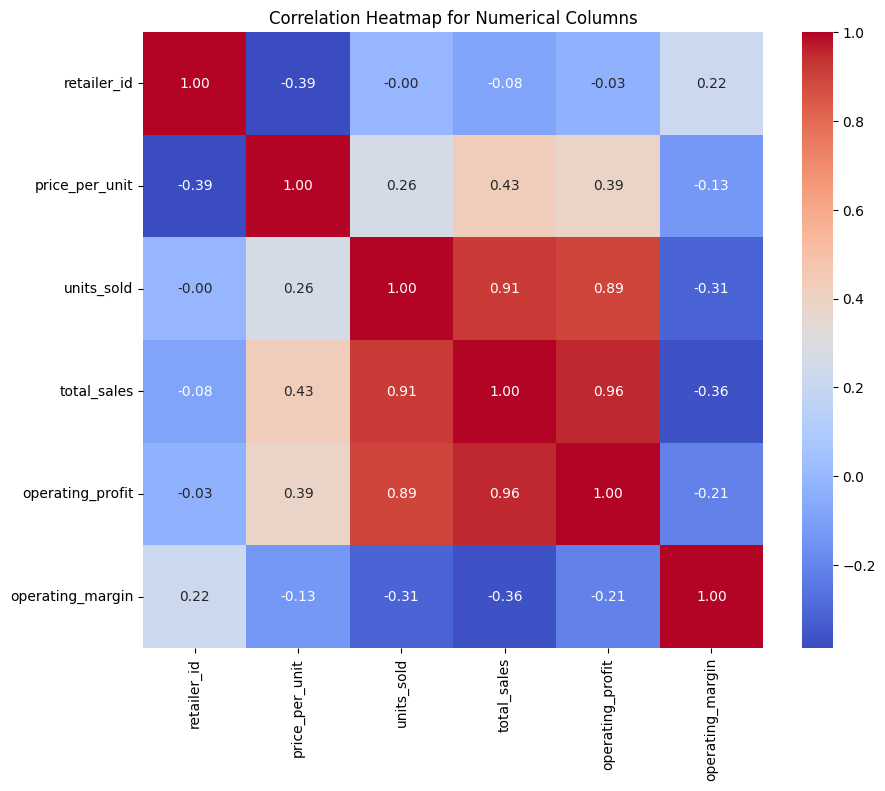

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


Kita dapat melihat bahwa **Total Sales** memiliki korelasi yang tinggi dengan **operating profit**, **price per unit**, dan **units sold**.

# **Summary of Adidas Sales Data Analysis in the United States**

## Distribusi Toko dan Penjualan

* **Retailer:** Foot Locker memiliki jumlah toko terbanyak (2637), diikuti West Gear (2374) dan Walmart (626).
* **Region:** Wilayah Barat memiliki outlet penjualan terbanyak.
* **State:** California dan Texas memiliki jumlah toko terbanyak, diikuti New York dan Florida.
* **City:** Portland memiliki outlet penjualan terbanyak.


## Penjualan Berdasarkan Gender dan Produk

* **Gender:** Proporsi penjualan antara pria dan wanita hampir sama.
* **Produk:** Produk dengan penjualan tertinggi adalah "Men's Street Footwear", diikuti "Women's Apparel".

## Metode Penjualan dan Profit

* **Metode Penjualan:** Metode belanja online paling populer di kalangan pelanggan.
* **Profit:** Meskipun online populer, penjualan di dalam toko (in-store) menghasilkan profit operasional terbesar.
* **Total Penjualan dan Profit:** Penjualan in-store juga menghasilkan total penjualan dan profit tertinggi.


## Penjualan Berdasarkan Retailer dan Lokasi

* **Retailer:** West Gear menyumbang total penjualan tertinggi, diikuti Foot Locker dan Sport Direct.
* **State dengan Penjualan Tertinggi:** New York memiliki total penjualan tertinggi.
* **State dengan Penjualan Terendah:** Nebraska memiliki total penjualan terendah.



## Analisis Statistik

* **Confidence Interval:** Harga produk yang menarik bagi pelanggan berada dalam rentang $44 hingga $45.
* **Uji Hipotesis (Chi-square):** Terdapat hubungan signifikan antara total penjualan dan retailer.
* **Korelasi:** Total penjualan berkorelasi tinggi dengan profit operasional, harga per unit, dan jumlah unit terjual.

## Kesimpulan

Analisis ini memberikan wawasan berharga tentang kinerja penjualan Adidas di Amerika Serikat. Informasi ini dapat digunakan untuk mengoptimalkan strategi penjualan, meningkatkan profitabilitas, dan menargetkan pelanggan dengan lebih efektif.

# Business Insight and Recommendation

 1. Optimasi Strategi Penjualan Online:
    - Meningkatkan pengalaman belanja online untuk menyaingi kenyamanan
      berbelanja di dalam toko.
    - Menawarkan promosi eksklusif online dan pengiriman gratis untuk
      mendorong lebih banyak penjualan online.
    - Mengembangkan aplikasi mobile yang user-friendly untuk meningkatkan
      aksesibilitas dan kenyamanan.

 2. Fokus pada Produk Unggulan:
    - Meningkatkan produksi dan pemasaran "Men's Street Footwear" dan
      "Women's Apparel" karena merupakan produk dengan penjualan tertinggi.
    - Mengembangkan variasi produk dalam kategori tersebut untuk
      memenuhi permintaan yang berbeda.
    - Menawarkan diskon atau bundling produk untuk meningkatkan penjualan.

 3. Peningkatan Pengalaman Berbelanja di Toko:
    - Melatih staf penjualan untuk memberikan layanan pelanggan yang
      lebih baik dan meningkatkan pengetahuan produk.
    - Menciptakan suasana toko yang menarik dan nyaman untuk meningkatkan
      pengalaman berbelanja.
    - Menawarkan layanan tambahan seperti personal styling atau
      penyesuaian produk untuk meningkatkan nilai tambah.

 4. Ekspansi ke Pasar Baru:
    - Mempertimbangkan pembukaan toko baru di negara bagian dengan potensi
      pertumbuhan tinggi, seperti California dan Texas.
    - Menargetkan kota-kota dengan populasi besar dan minat tinggi pada
      produk olahraga dan gaya hidup.
    - Melakukan riset pasar untuk mengidentifikasi peluang baru di
      wilayah yang belum terjangkau.

 5. Pemanfaatan Data untuk Pengambilan Keputusan:
    - Menggunakan analisis data untuk memahami tren penjualan, preferensi
      pelanggan, dan perilaku kompetitor.
    - Mengembangkan strategi pemasaran yang lebih personal dan efektif
      berdasarkan data pelanggan.
    - Memantau kinerja penjualan secara real-time untuk mengidentifikasi
      area yang perlu ditingkatkan.

 6. Kolaborasi dengan Retailer:
    - Memperkuat hubungan dengan retailer utama seperti West Gear dan
      Foot Locker untuk meningkatkan visibilitas produk.
    - Menawarkan insentif kepada retailer untuk mempromosikan produk
      Adidas secara lebih aktif.
    - Mengembangkan program pemasaran bersama untuk menjangkau
      audiens yang lebih luas.

 7. Inovasi Produk dan Teknologi:
    - Terus berinovasi dalam desain produk dan teknologi untuk
      mempertahankan keunggulan kompetitif.
    - Mengembangkan produk yang berkelanjutan dan ramah lingkungan
      untuk memenuhi permintaan konsumen yang semakin sadar lingkungan.
    - Mengintegrasikan teknologi digital ke dalam produk untuk
      meningkatkan pengalaman pelanggan.

 Dengan menerapkan rekomendasi ini, Adidas dapat meningkatkan penjualan,
 profitabilitas, dan pangsa pasar di Amerika Serikat.
